<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Import-necessary-modules" data-toc-modified-id="Import-necessary-modules-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Import necessary modules</a></span></li><li><span><a href="#Load-putidaPRECISE321m" data-toc-modified-id="Load-putidaPRECISE321m-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Load putidaPRECISE321m</a></span></li><li><span><a href="#Load-the-sample-table-(i.e.-metadata-file)" data-toc-modified-id="Load-the-sample-table-(i.e.-metadata-file)-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Load the sample table (i.e. metadata file)</a></span><ul class="toc-item"><li><span><a href="#Load-the-TRN-file" data-toc-modified-id="Load-the-TRN-file-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Load the TRN file</a></span></li></ul></li><li><span><a href="#RbTnSeq332" data-toc-modified-id="RbTnSeq332-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>RbTnSeq332</a></span><ul class="toc-item"><li><span><a href="#optimize-threshold" data-toc-modified-id="optimize-threshold-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>optimize threshold</a></span></li><li><span><a href="#Enrich-a-common-regulator-for-fModules" data-toc-modified-id="Enrich-a-common-regulator-for-fModules-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Enrich a common regulator for fModules</a></span></li><li><span><a href="#Single-iMs" data-toc-modified-id="Single-iMs-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Single iMs</a></span></li><li><span><a href="#Rename-iMs" data-toc-modified-id="Rename-iMs-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Rename iMs</a></span></li><li><span><a href="#Add-iM-sizes" data-toc-modified-id="Add-iM-sizes-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Add iM sizes</a></span></li></ul></li><li><span><a href="#Compare-putidaPRECISE-and-putidaRBTnSeq" data-toc-modified-id="Compare-putidaPRECISE-and-putidaRBTnSeq-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Compare putidaPRECISE and putidaRBTnSeq</a></span></li></ul></div>

# Import necessary modules

In [1]:
from pymodulon.core import IcaData
from pymodulon.plotting import *
from os import path
import pandas as pd
import re
from Bio.KEGG import REST
from tqdm.notebook import tqdm
from pymodulon.compare import *

In [2]:
from pymodulon.compare import *
from pymodulon.io import *

In [3]:
import plotly as px
import plotly.express as px

In [4]:
from matplotlib_venn import venn2
from matplotlib_venn import venn3

In [5]:
plt.rcParams['svg.fonttype'] = 'none'

# Load putidaPRECISE321m

In [31]:
putida321 = load_json_model("../../modulome_jsons/putidaPRECISE321.json")

# Load the sample table (i.e. metadata file)

In [7]:
df_metadata = pd.read_csv('./data/raw_data/updated_sample_table.csv',index_col=0)

In [8]:
df_metadata

,orgId,expDesc,timeZeroSet,expGroup,expDescLong,mutantLibrary,person,dateStarted,setName,seqindex,...,concentration_1,condition_2,units_2,concentration_2,classifier,project,project2,condition,total_rep,rep
expName,,,,,,,,,,,,,,,,,,,,,
set1IT078,Putida,Glucose (C) (40mM),7/20/20 Putida_ML5_set1,carbon source,Glucose carbon source (40mM),Putida_ML5,Kelly,7/20/2020,Putida_ML5_set1,IT078,...,40.0,NaN,NaN,NaN,Glucose (C) (40mM)7/20/20 Putida_ML5_set1tube4...,set1,NaN,Glucose carbon source (40mM),2,1
set1IT079,Putida,Glucose (C) (40mM),7/20/20 Putida_ML5_set1,carbon source,Glucose carbon source (40mM),Putida_ML5,Kelly,7/20/2020,Putida_ML5_set1,IT079,...,40.0,NaN,NaN,NaN,Glucose (C) (40mM)7/20/20 Putida_ML5_set1tube4...,set1,NaN,Glucose carbon source (40mM),2,2
set1IT080,Putida,Glucose (C) (20mM),7/20/20 Putida_ML5_set1,carbon source,Glucose carbon source (20mM),Putida_ML5,Kelly,7/20/2020,Putida_ML5_set1,IT080,...,20.0,NaN,NaN,NaN,Glucose (C) (20mM)7/20/20 Putida_ML5_set1tube2...,set1,NaN,Glucose carbon source (20mM),2,1
set1IT081,Putida,Glucose (C) (20mM),7/20/20 Putida_ML5_set1,carbon source,Glucose carbon source (20mM),Putida_ML5,Kelly,7/20/2020,Putida_ML5_set1,IT081,...,20.0,NaN,NaN,NaN,Glucose (C) (20mM)7/20/20 Putida_ML5_set1tube2...,set1,NaN,Glucose carbon source (20mM),2,2
set1IT082,Putida,4-Hydroxyvalerate (C) (40mM),7/20/20 Putida_ML5_set1,carbon source,4-Hydroxyvalerate carbon source (40mM),Putida_ML5,Kelly,7/20/2020,Putida_ML5_set1,IT082,...,40.0,NaN,NaN,NaN,4-Hydroxyvalerate (C) (40mM)7/20/20 Putida_ML5...,set1,NaN,4-Hydroxyvalerate carbon source (40mM),2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
set101IT044,Putida,D-Glucose with ??-ketoadipate (C),12/07/2022 Putida_ML5_set101,carbon source,D-Glucose carbon source with ??-ketoadipate st...,Putida_ML5_JBEI,Andrew Borchert,7/22/2012,Putida_ML5_set101,IT044,...,20.0,??-ketoadipate,mM,125.0,D-Glucose with ??-ketoadipate (C)12/07/2022 P...,set101,NaN,D-Glucose carbon source with ??-ketoadipate st...,3,2
set101IT045,Putida,D-Glucose with ??-ketoadipate (C),12/07/2022 Putida_ML5_set101,carbon source,D-Glucose carbon source with ??-ketoadipate st...,Putida_ML5_JBEI,Andrew Borchert,7/22/2012,Putida_ML5_set101,IT045,...,20.0,??-ketoadipate,mM,125.0,D-Glucose with ??-ketoadipate (C)12/07/2022 P...,set101,NaN,D-Glucose carbon source with ??-ketoadipate st...,3,3
set101IT046,Putida,D-Glucose with levulinic acid (C),12/07/2022 Putida_ML5_set101,carbon source,D-Glucose carbon source with levulinic acid st...,Putida_ML5_JBEI,Andrew Borchert,7/22/2012,Putida_ML5_set101,IT046,...,20.0,levulinic acid,mM,125.0,D-Glucose with levulinic acid (C)12/07/2022 Pu...,set101,NaN,D-Glucose carbon source with levulinic acid st...,3,1


In [9]:
df_metadata[['project','condition','rep']].head()

,project,condition,rep
expName,,,
set1IT078,set1,Glucose carbon source (40mM),1
set1IT079,set1,Glucose carbon source (40mM),2
set1IT080,set1,Glucose carbon source (20mM),1
set1IT081,set1,Glucose carbon source (20mM),2
set1IT082,set1,4-Hydroxyvalerate carbon source (40mM),1


In [10]:
print(df_metadata.project.notnull().all())
print(df_metadata.condition.notnull().all())

True
True


## Load the TRN file

In [11]:
df_trn = pd.read_csv('./data/external/TRN_update_210616.csv')
df_trn.head()

,regulator,regulator_id,gene_id,gene_name,Pputida,evidence
0,Zur,PP_0119,PP_0117,znuB,True,"RegPrecise, http://regprecise.sbpdiscovery.org..."
1,Zur,PP_0119,PP_0118,znuC,True,"RegPrecise, http://regprecise.sbpdiscovery.org..."
2,Zur,PP_0119,PP_0119,zur,True,"RegPrecise, http://regprecise.sbpdiscovery.org..."
3,Zur,PP_0119,PP_0120,znuA,True,"RegPrecise, http://regprecise.sbpdiscovery.org..."
4,Zur,PP_0119,PP_0506,PP_0506,True,"RegPrecise, http://regprecise.sbpdiscovery.org..."


The `regulator` and `gene_id` must be filled in for each row

In [12]:
print(df_trn.regulator.notnull().all())
print(df_trn.gene_id.notnull().all())

True
True


# RbTnSeq332

In [13]:
#ensure every columns are sorted
ica_data_dir = './data/ICA_output/130/'
A=pd.read_csv(path.join(ica_data_dir,'A.csv'),index_col=0)
X=pd.read_csv("./data/raw_data/rb_tn_Seq_332.csv",index_col=0)

In [14]:
X=X[A.columns]
S=pd.read_csv(path.join(ica_data_dir,'S.csv'),index_col=0)
gene_table = pd.read_csv("./data/external/gene_info.csv", index_col=0)

In [15]:
diff = set(X.index) - set(gene_table.index)
for i in diff:
    gene_table.loc[i,'gene_name'] = i

In [16]:
gene_table

,gene_name,accession,old_locus_tag,start,end,strand,gene_product,COG,uniprot,operon
locus_tag,,,,,,,,,,
PP_0001,parB,AE015451.2,NaN,147.0,1019.0,-,probable chromosome-partitioning protein,"Replication, recombination and repair",NaN,Op0
PP_0002,parA,AE015451.2,NaN,1029.0,1820.0,-,probable chromosome partition protein,"Cell cycle control, cell division, chromosome ...",NaN,Op0
PP_0003,rsmG,AE015451.2,NaN,1839.0,2489.0,-,16S RNA methyltransferase,"Translation, ribosomal structure and biogenesis",NaN,Op0
PP_0004,trmF,AE015451.2,NaN,2486.0,4381.0,-,tRNA uridine 5-carboxymethylaminomethyl modifi...,"Cell cycle control, cell division, chromosome ...",NaN,Op0
PP_0005,trmE,AE015451.2,NaN,5012.0,6382.0,-,GTPase,"Translation, ribosomal structure and biogenesis",NaN,Op1
...,...,...,...,...,...,...,...,...,...,...
PP_t11,PP_t11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PP_t64,PP_t64,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PP_5SB,PP_5SB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
#M matrix renamed as S matrix

ica_data = IcaData(M = path.join(ica_data_dir,'S.csv'),
                   A = A,
                   X = X.loc[S.index],
                   gene_table = gene_table.loc[S.index],
                   sample_table=df_metadata.loc[A.columns][['project','condition','rep']],
                   trn = df_trn)

## optimize threshold

  0%|          | 0/39 [00:00<?, ?it/s]

1450

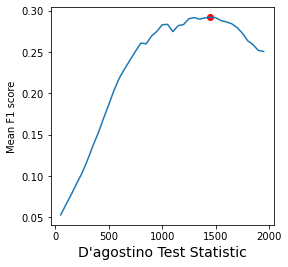

In [18]:
ica_data.reoptimize_thresholds()

In [19]:
# calculate the exaplained variance of the gene expression profiles
from pymodulon.util import explained_variance
explained_variance(ica_data)

0.8324243355059834

In [20]:
# add individual explained variance for each iModulon

for k in ica_data.imodulon_table.index:
    ica_data.imodulon_table.loc[k, 'exp_var'] = explained_variance(ica_data, imodulons=k)

## Enrich a common regulator for fModules

In [21]:
ica_data.compute_trn_enrichment(save=True,fdr=.0001)

/opt/anaconda3/envs/pymodulon/lib/python3.10/site-packages/pymodulon/core.py:610: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  keep_cols = self.imodulon_table.loc[


,imodulon,regulator,pvalue,qvalue,precision,recall,f1score,TP,regulon_size,imodulon_size,n_regs
0,4,BenR,3.426803e-11,1.713402e-10,0.307692,1.000000,0.470588,4.0,4.0,13.0,1.0
1,4,CatR,2.087249e-05,4.733852e-05,0.153846,0.666667,0.250000,2.0,3.0,13.0,1.0
2,4,Crc,2.840311e-05,4.733852e-05,0.307692,0.057143,0.096386,4.0,70.0,13.0,1.0
3,5,GcsR,1.902034e-08,1.141220e-07,0.333333,0.750000,0.461538,3.0,4.0,9.0,1.0
4,6,GbdR,7.597612e-34,4.558567e-33,0.727273,0.571429,0.640000,16.0,28.0,22.0,1.0
5,6,RoxR,2.232117e-17,6.696350e-17,0.500000,0.229167,0.314286,11.0,48.0,22.0,1.0
6,7,GltR-II,1.215881e-08,1.215881e-07,0.181818,0.571429,0.275862,4.0,7.0,22.0,1.0
7,10,PrpR,6.306979e-07,3.153489e-06,0.187500,0.500000,0.272727,3.0,6.0,16.0,1.0
8,10,GnuR,1.758679e-06,4.396697e-06,0.187500,0.375000,0.250000,3.0,8.0,16.0,1.0
9,11,BirA,9.042941e-11,4.521471e-10,0.444444,0.666667,0.533333,4.0,6.0,9.0,1.0


In [22]:
ica_data.imodulon_table

,regulator,pvalue,qvalue,precision,recall,f1score,TP,regulon_size,imodulon_size,n_regs,exp_var
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.002067
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.026253
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.009765
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.003174
4,BenR,3.426803e-11,1.713402e-10,0.307692,1.0,0.470588,4.0,4.0,13.0,1.0,0.002326
...,...,...,...,...,...,...,...,...,...,...,...
79,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.002143
80,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.013214
81,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.004440
82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.002157


## Single iMs

In [23]:
sg_imods = ica_data.find_single_gene_imodulons()
sg_imods

[1, 2, 34, 37, 53, 58, 63, 65, 66, 68, 70, 80, 81]

## Rename iMs

In [24]:
for i in ica_data.imodulon_table.index:
    ica_data.rename_imodulons({i:'fModule_'+str(i+1)})

## Add iM sizes

In [25]:
for i in ica_data.imodulon_table.index:
    ica_data.imodulon_table.loc[i,'imodulon_size'] = ica_data.view_imodulon(i).index.size

In [26]:
ica_data.imodulon_table

,regulator,pvalue,qvalue,precision,recall,f1score,TP,regulon_size,imodulon_size,n_regs,exp_var
fModule_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,0.002067
fModule_2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,NaN,0.026253
fModule_3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,0.009765
fModule_4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.0,NaN,0.003174
fModule_5,BenR,3.426803e-11,1.713402e-10,0.307692,1.0,0.470588,4.0,4.0,13.0,1.0,0.002326
...,...,...,...,...,...,...,...,...,...,...,...
fModule_80,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.002143
fModule_81,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,0.013214
fModule_82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,0.004440
fModule_83,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,0.002157


In [27]:
save_to_json(ica_data,'./putdaRBTnSeq332.json')

# Compare putidaPRECISE and putidaRBTnSeq

In [33]:
k=-1
for i in ica_data.imodulon_table.index:
    temp = ica_data.view_imodulon(i)
    k=k+1
    if(temp.index.size==0):
        continue
    
    for j in temp.index:
        temp_list = []
        for iM_index in putida321.imodulon_table.index:
            if j in putida321.view_imodulon(iM_index).index:
                temp_list.append(str(iM_index))
        
        temp.loc[j, 'iModulon']=','.join(temp_list)
    if(len(temp.iModulon.unique())!=1):
        temp.to_csv("./iModulon_membership/k_"+str(k)+'_'+str(i)+'_gene_table.csv')